In [29]:
import json

In [30]:


experiments_path = "../"

def fc_to_string(k,cfg):
    res = f"k_{k}bits_"
    for layer in cfg:
        res += str(layer["bits"]) + "."
    
    res +=  "logsize_"
    for layer in cfg:
        res = res + str(layer["logsize"]) + "."
    
    return res


def bits_str(cfg):
    res = "b."
    for layer in cfg:
        res += str(layer["bits"]) + "."
    
    return res

def bits_valid(cfg):
    for layer in cfg:
        if layer["bits"] > 128:
            return False
    
    return True

def logsize_str(cfg):
    res = "sz."
    for layer in cfg:
        res = res + str(layer["logsize"]) + "."
    
    return res
  
def load_configs(name):
    with open(f'{experiments_path}config_{name}', 'r') as myfile:
        data=myfile.read()
        obj = json.loads(data)
        return obj["config"]  

def load_exp(fn):
    try:
        with open(fn, 'r') as myfile:
            data=myfile.read()
            # print(data)
            obj = json.loads(data)
            return obj
    except Exception as err:
        print(err)
        return None

    
datasets =[
           ("Twitter 1 mio","twitter_1mio_coords.h5"),
           ("Twitter 10 mio","twitter_10mio_coords.h5"),
           ("Twitter 100 mio","twitter_100mio_coords.h5"),
           ("Twitter 50 mio","twitter_50mio_coords.h5"),
           ("Twitter 200 mio","twitter_200mio_coords.h5"),
           ("OSM 500 mio","asia_500mio_coords.h5"),         
           ("OSM 1 bil","asia_1bil_coords.h5")
          
          ]

ds_size ={
           "Twitter 1 mio": 1_000_000,
           "Twitter 10 mio":10_000_000,
           "Twitter 100 mio":100_000_000,
           "Twitter 50 mio":50_000_000,
           "Twitter 200 mio":200_000_000,
           "OSM 500 mio":500_000_000,      
           "OSM 1 bil":1_000_000_000,
          
    }

In [31]:
k = 8;
x = 0;
width = 1 * 8192
height = 1 * 8192;
exp_name = "test_datasets_with_errord";


cfgs = load_configs(exp_name)

7 12
{'b.1.8.': 0, 'b.1.16.': 1, 'b.1.32.': 2, 'b.1.64.': 3, 'b.8.16.': 4, 'b.8.32.': 5, 'b.8.64.': 6}
{'sz.16.20.': 0, 'sz.16.24.': 1, 'sz.16.28.': 2, 'sz.20.16.': 3, 'sz.20.24.': 4, 'sz.20.28.': 5, 'sz.24.16.': 6, 'sz.24.20.': 7, 'sz.24.28.': 8, 'sz.28.16.': 9, 'sz.28.20.': 10, 'sz.28.24.': 11}


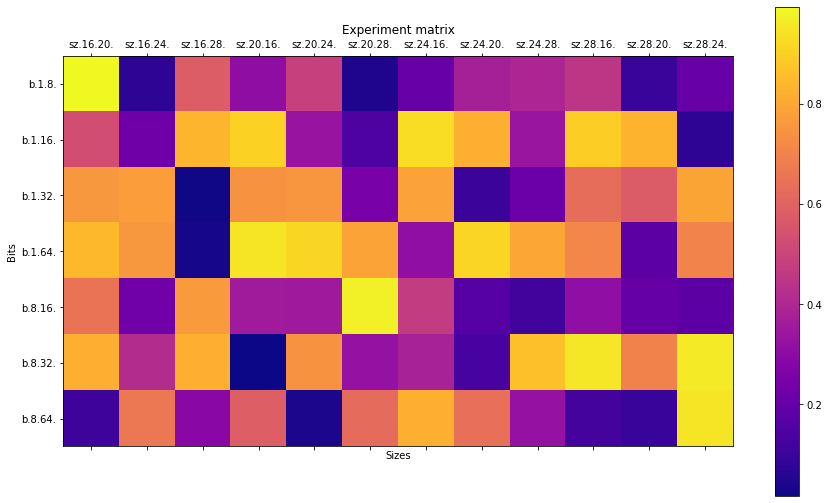

In [32]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import matplotlib.backends.backend_pdf as pdf
import tqdm

def save_figs(fn):
    print(f"-->  Saving all figures... {fn}")
    out_pdf = pdf.PdfPages(fn)
    for fig in tqdm.tqdm(range(1, plt.gcf().number+1)):
        out_pdf.savefig( fig )
    out_pdf.close()
    plt.close("all")


def make_maps_smaller(size, cfgs):
    bits_map = {}
    logsize_map = {}

    count_bits =0
    count_sizes = 0
    for c in cfgs :

        if len(c) <size and bits_valid(c):
            if(not bits_str(c) in bits_map):
                bits_map[bits_str(c)] = count_bits
                count_bits+=1
            if(not logsize_str(c) in logsize_map):
                logsize_map[logsize_str(c)] = count_sizes
                count_sizes+=1
    return bits_map, logsize_map

def make_maps_any( cfgs):
    bits_map = {}
    logsize_map = {}

    count_bits =0
    count_sizes = 0
    for c in cfgs :
        if bits_valid(c):
            if(not bits_str(c) in bits_map):
                bits_map[bits_str(c)] = count_bits
                count_bits+=1
            if(not logsize_str(c) in logsize_map):
                logsize_map[logsize_str(c)] = count_sizes
                count_sizes+=1
    return bits_map, logsize_map

def make_maps(size, cfgs):
    bits_map = {}
    logsize_map = {}

    count_bits =0
    count_sizes = 0
    for c in cfgs :

        if len(c) ==size and bits_valid(c):
            if(not bits_str(c) in bits_map):
                bits_map[bits_str(c)] = count_bits
                count_bits+=1
            if(not logsize_str(c) in logsize_map):
                logsize_map[logsize_str(c)] = count_sizes
                count_sizes+=1
    return bits_map, logsize_map

def plot_matrix(cm, title='Experiment matrix', cmap='plasma', xlabels=None, ylabels=None, cblabel=None):
    fig = plt.figure(figsize=(len(xlabels)*1.25, 2+ len(ylabels)))
    ax = fig.add_subplot(111)
    # ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
    # ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    cax = ax.matshow(cm,cmap=cmap)
    plt.title(title)
    ax.set_xticks(range(len(xlabels)))
    ax.set_yticks(range(len(ylabels)))
    cbar = fig.colorbar(cax)

    if cblabel:
        cbar.set_label(cblabel)
    if xlabels:
        ax.set_xticklabels(list(xlabels))
    if ylabels:
        ax.set_yticklabels(list(ylabels))
    plt.xlabel('Sizes')
    plt.ylabel('Bits')
    #plt.show()
    

bits_map, logsize_map = make_maps(2,cfgs)

print(len(bits_map), len(logsize_map))
print(bits_map)
print(logsize_map)
a = np.random.rand(len(bits_map), len(logsize_map))
plot_matrix(a, ylabels=bits_map.keys(), xlabels=logsize_map.keys())


In [39]:
figsize=(4,4)
def plot_some(cm, title='Experiment', xlabels=None, ylabels=None, cblabel=None, K=range(1,30)):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    # print(xlabels)
    # print(ylabels)
    sz = 1

    lines = ['-', '--', '-.', ':']
    i = 0
    for x in range(0,len(xlabels)):
        for y in range(0,len(ylabels)):
            # print(x,y)
            vals = []
            for k in K:
                vals.append( cm[k][y,x])
            plt.plot(list(K), vals, label=f'{ylabels[y]}{xlabels[x]}', linewidth=sz, linestyle=lines[i%len(lines)])
            i += 1
            sz += 0.5
    plt.legend()
    plt.title(title)

    #plt.show()

def make_matrices(size, cfgs):
    bits_map, logsize_map = make_maps_any(cfgs)
    # print(bits_map)
    matrices= {}
    matrix_indices = ["magnitude_mean", "magnitude_max", "magnitude_min"]
    

    for dn, ds in datasets :
        matrices[ds] = {}
        for mi in matrix_indices:
            matrices[ds][mi] ={}
            matrices[ds]["magnitude_std"] = {}


    x=0
    for c in cfgs :
        # print(fc_to_string(k,c))
        y = 0;
        for  dn, ds in datasets :
            fn = experiments_path + exp_name + "/" + exp_name + f'.w{width}h{height}.{x:04d}.{y}-' + fc_to_string(k,c) \
            + ds + ".json"
            data = load_exp(fn)
            bits = bits_str(c)
            sz = logsize_str(c)
            if data and bits in bits_map and  sz in logsize_map and bits_valid(c):
                if int(data["summary"]["mb_size"]) < 1000 and c[-1]["bits"] >16:                                        
                    kb_size = f'{int(data["summary"]["mb_size"])}'
                    
                    matrices[ds]["magnitude_std"][kb_size] = {}
                    mean = data["summary"]["error_summary"]["magnitude_mean"]                    
                    hist = data["summary"]["error_summary"]["histogram"]
                    om = np.sum([pow(x-mean,2) for x in hist])/len(hist)
                    
                    matrices[ds]["magnitude_std"][kb_size]["global"] = np.sqrt(om)
                    
                    for mi in matrix_indices:
                        matrices[ds][mi][kb_size] = {}
                        #print(mi, kb_size, bits, sz)                    
                        #if kb_size in matrices[ds][mi]:
                        #    print(mi,"double trouble", kb_size, bits, sz, (matrices[ds][mi][kb_size] == data["perf"][mi]) )
                        matrices[ds][mi][kb_size]["global"] = data["summary"]["error_summary"][mi]
                        
                        
                        matrices[ds][mi][kb_size]["conf"] = f'{data["summary"]["mb_size"]}mb ({bits}{sz})'
                        matrices[ds][mi][kb_size]["l1"] = c[0]["bits"]
                        matrices[ds][mi][kb_size]["ll"] = c[-1]["bits"]
                        
            y+=1
        x+=1

    
    ds_min = {}
    ds_max = {}
    ds_mean = {}
    ds_std = {}
    
    for idx in matrices[ds]["magnitude_mean"].keys():
        ds_min[idx] = []
        ds_max[idx] = []
        ds_mean[idx] = []
        ds_std[idx] = []
        for dn, ds in datasets : 
            comp = float(idx) /  (ds_size[dn]*8)
            if matrices[ds]["magnitude_max"][idx]["ll"]<=16 or comp > 1.0:
                print("--->",ds, idx,matrices[ds]["magnitude_max"][idx]["conf"], matrices[ds]["magnitude_max"][idx]["global"]/ds_size[dn] )
            else:
                ds_min[idx].append(matrices[ds]["magnitude_min"][idx]["global"]/ds_size[dn])
                ds_max[idx].append(matrices[ds]["magnitude_max"][idx]["global"]/ds_size[dn])            
                ds_mean[idx].append(matrices[ds]["magnitude_mean"][idx]["global"]/ds_size[dn])
                ds_std[idx].append(matrices[ds]["magnitude_std"][idx]["global"]/ds_size[dn])
            
                      
            #if matrices[ds]["magnitude_max"][idx]["l1"] == 1:
            #    print(ds, idx,matrices[ds]["magnitude_max"][idx]["conf"], matrices[ds]["magnitude_max"][idx]["global"]/ds_size[dn])
    keys = list(ds_min.keys())
    for idx in keys:
        if len(ds_min[idx]) == 0:
            del ds_min[idx]
            del ds_max[idx]
            del ds_mean[idx]
            del ds_std[idx]
        else:
            ds_min[idx] = np.min(np.array(ds_min[idx]))
            ds_max[idx] = np.max(np.array(ds_max[idx]))
            ds_mean[idx] = np.mean(np.array(ds_mean[idx]))
            ds_std[idx] = np.mean(ds_std[idx])

    means = np.array(list(ds_mean.values()))*100
    maxes = np.array(list(ds_max.values()))*100
    mins = np.array(list(ds_min.values()))*100
    std = np.array(list(ds_std.values()))*100
        
            
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)

    markers = ["o", "s", "^"]
    ds = datasets[0][1]
    """
    for i in range(1,4):
        x = list(map(int, matrices[ds]["query_time"][str(i)].keys()))
        y = matrices[ds]["query_time"][str(i)].values()
        plt.scatter(x , y, label=f"{i} Layers", marker=markers[i-1], s=40)
    """
    # create stacked errorbars:
    x = list(map(int,  ds_min.keys()))
    plt.errorbar(x, means, std, fmt='ok', lw=3,capsize=3, label="mean +- std")
    plt.errorbar(x , means, [means - mins, maxes - means],
                 fmt='.k', ecolor='gray', capsize=6, lw=1, label="[min max]")



    plt.legend(loc='upper left')
    plt.title("Error Sizes")
    plt.xlabel('Size (mb)')
    plt.ylabel('Error Size %') 
    plt.subplots_adjust(left=0.2)
    
    
make_matrices(3, cfgs)

save_figs("test_datasets_with_errord_sizes.pdf")

-->  Saving all figures... test_datasets_with_errord_sizes.pdf


100%|██████████| 1/1 [00:00<00:00, 20.29it/s]


In [38]:
def make_matrices(size, cfgs):
    bits_map, logsize_map = make_maps_any(cfgs)
    # print(bits_map)
    matrices= {}
    matrix_indices = ["magnitude_mean", "magnitude_max", "magnitude_min"]
    

    for dn, ds in datasets :
        matrices[ds] = {}
        for mi in matrix_indices:
            matrices[ds][mi] ={}
            matrices[ds]["magnitude_std"] = {}


    x=0
    for c in cfgs :
        # print(fc_to_string(k,c))
        y = 0;
        for  dn, ds in datasets :
            fn = experiments_path + exp_name + "/" + exp_name + f'.w{width}h{height}.{x:04d}.{y}-' + fc_to_string(k,c) \
            + ds + ".json"
            data = load_exp(fn)
            bits = bits_str(c)
            sz = logsize_str(c)
            if data and bits in bits_map and  sz in logsize_map and bits_valid(c):
                kb_size = f'{int(data["summary"]["mb_size"])}'

                matrices[ds]["magnitude_std"][kb_size] = {}
                mean = data["summary"]["error_summary"]["magnitude_mean"]                    
                hist = data["summary"]["error_summary"]["histogram"]
                om = np.sum([pow(x-mean,2) for x in hist])/len(hist)

                matrices[ds]["magnitude_std"][kb_size]["global"] = np.sqrt(om)
                for mi in matrix_indices:                    
                    if int(data["summary"]["mb_size"]) < 1000:                        
                        matrices[ds][mi][kb_size] = {}
                        #print(mi, kb_size, bits, sz)                    
                        #if kb_size in matrices[ds][mi]:
                        #    print(mi,"double trouble", kb_size, bits, sz, (matrices[ds][mi][kb_size] == data["perf"][mi]) )
                        matrices[ds][mi][kb_size]["global"] = data["summary"]["error_summary"][mi]
                        matrices[ds][mi][kb_size]["conf"] = f'{data["summary"]["mb_size"]}mb ({bits}{sz})'
                        matrices[ds][mi][kb_size]["l1"] = c[0]["bits"]
                        matrices[ds][mi][kb_size]["ll"] = c[-1]["bits"]
                        
                        
            y+=1
        x+=1



    ds_min = {}
    ds_max = {}
    ds_mean = {}
    ds_std = {}
    
    
    for dn, ds in datasets[1:] : 
        
        ds_min[dn] = []
        ds_max[dn] = []
        ds_mean[dn] = []
        ds_std[dn] = []
        for idx in matrices[ds]["magnitude_mean"].keys():
            comp = float(idx) /  (ds_size[dn]*8)
            if matrices[ds]["magnitude_max"][idx]["ll"]<=16 or comp >1.0:
                print("--->",ds, idx,matrices[ds]["magnitude_max"][idx]["conf"], matrices[ds]["magnitude_max"][idx]["global"]/ds_size[dn] )
            else:
                ds_min[dn].append(matrices[ds]["magnitude_min"][idx]["global"]/ds_size[dn])
                ds_max[dn].append(matrices[ds]["magnitude_max"][idx]["global"]/ds_size[dn])            
                ds_mean[dn].append(matrices[ds]["magnitude_mean"][idx]["global"]/ds_size[dn])
                ds_std[dn].append(matrices[ds]["magnitude_std"][idx]["global"]/ds_size[dn])
            
                      
            #if matrices[ds]["magnitude_max"][idx]["l1"] == 1:
            #    print(ds, idx,matrices[ds]["magnitude_max"][idx]["conf"], matrices[ds]["magnitude_max"][idx]["global"]/ds_size[dn])

        ds_min[dn] = np.min(np.array(ds_min[dn]))
        ds_max[dn] = np.max(np.array(ds_max[dn]))
        ds_mean[dn] = np.mean(np.array(ds_mean[dn]))
        ds_std[dn] = np.mean(ds_std[dn])

    means = np.array(list(ds_mean.values()))*100
    maxes = np.array(list(ds_max.values()))*100
    mins = np.array(list(ds_min.values()))*100
    std = np.array(list(ds_std.values()))*100
        
            
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)

    markers = ["o", "s", "^"]
    ds = datasets[0][1]
    """
    for i in range(1,4):
        x = list(map(int, matrices[ds]["query_time"][str(i)].keys()))
        y = matrices[ds]["query_time"][str(i)].values()
        plt.scatter(x , y, label=f"{i} Layers", marker=markers[i-1], s=40)
    """
    # create stacked errorbars:
    plt.errorbar(ds_max.keys(), means, std, fmt='ok', lw=3,capsize=3, label="mean +- std")
    plt.errorbar(ds_max.keys() , means, [means - mins, maxes - means],
                 fmt='.k', ecolor='gray', capsize=6, lw=1, label="[min max]")



    plt.legend(loc='upper left')
    plt.title("Error Sizes")
    plt.xlabel('Dataset')
    plt.ylabel('Error Size %') 
    plt.xticks(rotation=30, ha='right')
    plt.subplots_adjust(left=0.2, bottom=0.2)
    
    
make_matrices(3, cfgs)


save_figs("test_datasets_with_errord_ds.pdf")

---> twitter_10mio_coords.h5 0 0.125mb (b.1.sz.20.) 0.0228657
---> twitter_10mio_coords.h5 1 1mb (b.8.sz.20.) 0.0228403
---> twitter_10mio_coords.h5 33 33mb (b.1.8.sz.28.20.) 0.0228402
---> twitter_10mio_coords.h5 65 65mb (b.1.8.16.sz.28.20.24.) 0.0162867
---> twitter_10mio_coords.h5 2 2mb (b.1.sz.24.) 0.0228657
---> twitter_10mio_coords.h5 4 4mb (b.1.16.sz.24.20.) 0.0163122
---> twitter_10mio_coords.h5 513 513mb (b.8.16.sz.20.28.) 0.0162868
---> twitter_10mio_coords.h5 16 16mb (b.8.sz.24.) 0.0228403
---> twitter_10mio_coords.h5 18 18mb (b.8.16.sz.24.20.) 0.0162868
---> twitter_10mio_coords.h5 32 32mb (b.1.sz.28.) 0.0228657
---> twitter_10mio_coords.h5 64 64mb (b.1.16.sz.28.24.) 0.0163122
---> twitter_10mio_coords.h5 528 528mb (b.8.16.sz.24.28.) 0.0162868
---> twitter_10mio_coords.h5 256 256mb (b.8.sz.28.) 0.0228403
---> twitter_10mio_coords.h5 258 258mb (b.8.16.sz.28.20.) 0.0162868
---> twitter_10mio_coords.h5 512 512.125mb (b.1.16.sz.20.28.) 0.0163122
---> twitter_10mio_coords.h5 288

100%|██████████| 1/1 [00:00<00:00, 27.28it/s]


In [37]:
def make_matrices(size, cfgs):
    bits_map, logsize_map = make_maps_any(cfgs)
    # print(bits_map)
    matrices= {}
    matrix_indices = ["magnitude_mean", "magnitude_max", "magnitude_min"]
    

    for dn, ds in datasets :
        matrices[ds] = {}
        for mi in matrix_indices:
            matrices[ds][mi] ={}
            matrices[ds]["magnitude_std"] = {}


    x=0
    for c in cfgs :
        # print(fc_to_string(k,c))
        y = 0;
        for  dn, ds in datasets :
            fn = experiments_path + exp_name + "/" + exp_name + f'.w{width}h{height}.{x:04d}.{y}-' + fc_to_string(k,c) \
            + ds + ".json"
            data = load_exp(fn)
            bits = bits_str(c)
            sz = logsize_str(c)
            if data and bits in bits_map and  sz in logsize_map and bits_valid(c):
                kb_size = f'{int(data["summary"]["byte_size"])}'

                matrices[ds]["magnitude_std"][kb_size] = {}
                mean = data["summary"]["error_summary"]["magnitude_mean"]                    
                hist = data["summary"]["error_summary"]["histogram"]
                om = np.sum([pow(x-mean,2) for x in hist])/len(hist)

                matrices[ds]["magnitude_std"][kb_size]["global"] = np.sqrt(om)
                for mi in matrix_indices:
                    if int(data["summary"]["mb_size"]) < 1000 and c[-1]["bits"] >16:                        
                        matrices[ds][mi][kb_size] = {}
                        #print(mi, kb_size, bits, sz)                    
                        #if kb_size in matrices[ds][mi]:
                        #    print(mi,"double trouble", kb_size, bits, sz, (matrices[ds][mi][kb_size] == data["perf"][mi]) )
                        matrices[ds][mi][kb_size]["global"] = data["summary"]["error_summary"][mi]
                        matrices[ds][mi][kb_size]["conf"] = f'{data["summary"]["mb_size"]}mb ({bits}{sz})'
                        matrices[ds][mi][kb_size]["l1"] = c[0]["bits"]
                        matrices[ds][mi][kb_size]["ll"] = c[-1]["bits"]
                        
                        
            y+=1
        x+=1



    ds_min = {}
    ds_max = {}
    ds_mean = {}
    ds_std = {}
    
    
    for dn, ds in datasets[1:] :        
        
        for idx in matrices[ds]["magnitude_mean"].keys():
            comp = float(idx) /  (ds_size[dn]*8)

            if matrices[ds]["magnitude_max"][idx]["ll"]<=16 or comp >=1.0:
                ;
                #print("--->", comp,ds, idx,matrices[ds]["magnitude_max"][idx]["conf"], matrices[ds]["magnitude_max"][idx]["global"]/ds_size[dn] )
            else:
                cr = f'{comp}'
                ds_min[cr] = []
                ds_max[cr] = []
                ds_mean[cr] = []
                ds_std[cr] = []
                mmin = (matrices[ds]["magnitude_min"][idx]["global"])
                mmax = (matrices[ds]["magnitude_max"][idx]["global"])
                if mmin > mmax:
                    mmin = mmax
                ds_min[cr].append(mmin/ds_size[dn])
                ds_max[cr].append(mmax/ds_size[dn])            
                ds_mean[cr].append(matrices[ds]["magnitude_mean"][idx]["global"]/ds_size[dn])
                ds_std[cr].append(matrices[ds]["magnitude_std"][idx]["global"]/ds_size[dn])
            
                      
            #if matrices[ds]["magnitude_max"][idx]["l1"] == 1:
            #    print(ds, idx,matrices[ds]["magnitude_max"][idx]["conf"], matrices[ds]["magnitude_max"][idx]["global"]/ds_size[dn])
    for cr in ds_min.keys() :
        ds_min[cr] = np.min(np.abs(np.array(ds_min[cr])))
        ds_max[cr] = np.max(np.abs(np.array(ds_max[cr])))
        ds_mean[cr] = np.mean(np.array(ds_mean[cr]))
        ds_std[cr] = np.mean(ds_std[cr])

    means = np.array(list(ds_mean.values()))*100
    maxes = np.array(list(ds_max.values()))*100
    mins = np.array(list(ds_min.values()))*100
    std = np.array(list(ds_std.values()))*100
    
    print("maxe",np.max(maxes) ,np.mean(maxes)) 
    print("max min",np.min(maxes))  
    print("mins",np.max(mins) ,np.mean(mins)) 
    print("mins min",np.min(mins)) 
    print(maxes)
    
    ymax = np.max(maxes) 
    
    ####################################      
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)

    markers = ["o", "s", "^"]
    ds = datasets[0][1]
    """
    for i in range(1,4):
        x = list(map(int, matrices[ds]["query_time"][str(i)].keys()))
        y = matrices[ds]["query_time"][str(i)].values()
        plt.scatter(x , y, label=f"{i} Layers", marker=markers[i-1], s=40)
    """
    # create stacked errorbars:
    x = np.array(list(map(float, ds_max.keys())))*100
    plt.errorbar(x, means, std, fmt='ok', lw=3,capsize=3, label="mean +- std")
    plt.errorbar(x , means, [means - mins, maxes - means],
                 fmt='.k', ecolor='darkgray', alpha=0.4, capsize=6, lw=1, label="[min max]")



    plt.legend(loc='upper left')
    plt.title("Error Sizes")
    plt.xlabel('Compression Ratio %')
    plt.xticks(np.arange(0,100,10))
    plt.ylim([0, ymax+0.001])
    plt.ylabel('Error Size %') 
    plt.subplots_adjust(left=0.2)
    #plt.xticks(rotation=30, ha='right')
    ####################################
    
                
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    #ax.set_yscale('log')

    markers = ["o", "s", "^"]
    ds = datasets[0][1]
    """
    for i in range(1,4):
        x = list(map(int, matrices[ds]["query_time"][str(i)].keys()))
        y = matrices[ds]["query_time"][str(i)].values()
        plt.scatter(x , y, label=f"{i} Layers", marker=markers[i-1], s=40)
    """
    # create stacked errorbars:
    x = np.array(list(map(float, ds_max.keys())))*100
    plt.errorbar(x, means, std, fmt='ok', lw=1,capsize=3, label="mean +- std")



    plt.legend(loc='upper left')
    plt.title("Error Sizes")
    plt.xlabel('Compression Ratio %')
    plt.xticks(np.arange(0,100,10))
    plt.ylim([0, np.max(means)+0.001])
    plt.subplots_adjust(left=0.2)
    plt.ylabel('Error Size %') 
    #plt.xticks(rotation=30, ha='right')    
    ####################################
    
make_matrices(3, cfgs)
save_figs("test_datasets_with_errord_compression.pdf")

maxe 0.0223725 0.0031876835294117646
max min 0.0
mins 0.0066078 7.962691176470589e-05
mins min 0.0
[2.56000e-03 1.00000e-05 1.00000e-05 1.00000e-05 2.55000e-03 2.55000e-03
 2.55000e-03 2.56000e-03 2.56000e-03 1.00000e-05 1.00000e-05 1.00000e-05
 1.00000e-05 2.56000e-03 2.56000e-03 2.55000e-03 2.55000e-03 2.56000e-03
 1.00000e-05 1.13400e-02 1.13400e-02 5.99000e-03 5.99000e-03 5.99000e-03
 5.78000e-03 5.78000e-03 1.00000e-05 1.00000e-05 1.00000e-05 1.00000e-05
 5.98000e-03 5.98000e-03 2.55000e-03 2.55000e-03 2.56000e-03 2.56000e-03
 1.13400e-02 1.13400e-02 1.13400e-02 1.13400e-02 1.13400e-02 5.80000e-03
 5.80000e-03 5.80000e-03 5.80000e-03 5.80000e-03 9.60000e-05 5.98000e-03
 1.00000e-05 1.00000e-05 1.00000e-05 1.15100e-02 1.00000e-05 2.55000e-03
 2.55000e-03 2.55000e-03 2.55000e-03 2.55000e-03 1.13400e-02 1.13400e-02
 1.13400e-02 1.13400e-02 1.13400e-02 1.00000e-05 1.00000e-05 1.00000e-05
 1.00000e-05 1.00000e-05 5.78000e-03 5.78000e-03 1.00000e-05 5.10000e-04
 2.56000e-03 1.00000e-05 

100%|██████████| 2/2 [00:00<00:00,  7.35it/s]
